In [3]:
# Các thư viện sẽ dùng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Binomial
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [4]:
df = pd.read_csv('shopping_trends_updated.csv')


In [5]:
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
# hiển thị các hàm của dataset
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [8]:
# xem cấu trúc data và nội dung của data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
# Tóm tắt thống kê toàn bộ dataframe
summary = df.describe(include='all')
print(summary)

        Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean    1950.500000    44.068462    NaN            NaN       NaN   
std     1125.977353    15.207589    NaN            NaN       NaN   
min        1.000000    18.000000    NaN            NaN       NaN   
25%      975.750000    31.000000    NaN            NaN       NaN   
50%     1950.500000    44.000000    NaN            NaN       NaN   
75%     2925.250000    57.000000    NaN            NaN       NaN   
max     3900.000000    70.000000    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count             3900.000000     3900  3900   3900    3900    3900.000000   
unique                    N

C:\Users\Hp\AppData\Local\Temp\ipykernel_63252\1121980874.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\Hp\AppData\Local\Temp\ipykernel_63252\1121980874.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
C:\Users\Hp\AppData\Local\Temp\ipykernel_63252\1121980874.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

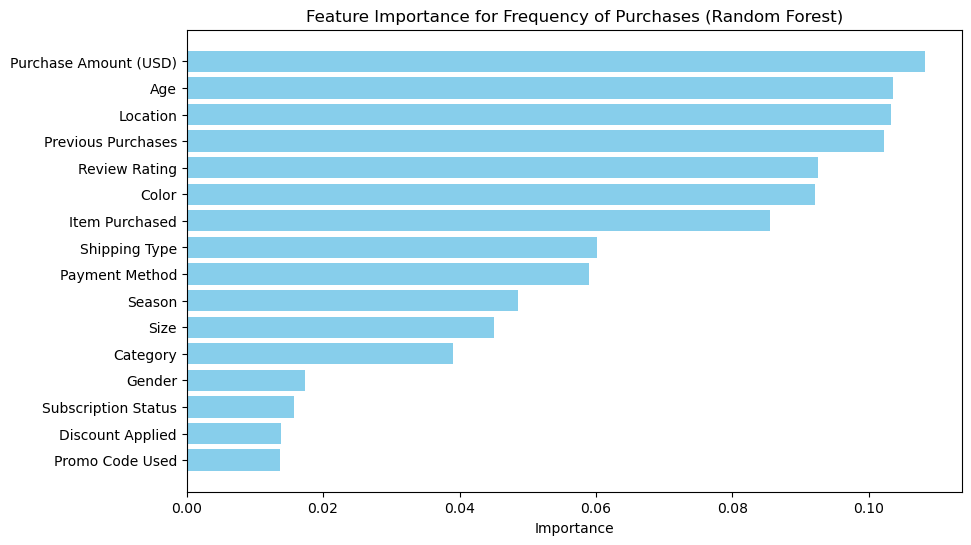

                  Feature  Importance
4   Purchase Amount (USD)    0.108226
0                     Age    0.103504
5                Location    0.103336
14     Previous Purchases    0.102276
9           Review Rating    0.092595
7                   Color    0.092178
2          Item Purchased    0.085551
11          Shipping Type    0.060105
15         Payment Method    0.059000
8                  Season    0.048608
6                    Size    0.045062
3                Category    0.039003
1                  Gender    0.017406
10    Subscription Status    0.015739
12       Discount Applied    0.013758
13        Promo Code Used    0.013653


In [10]:

# Chọn biến mục tiêu (target) và các đặc trưng (features)
target = 'Frequency of Purchases'
features = ['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 
            'Location', 'Size', 'Color', 'Season', 'Review Rating', 
            'Subscription Status', 'Shipping Type', 'Discount Applied', 
            'Promo Code Used', 'Previous Purchases', 'Payment Method']

X = df[features]
y = df[target]

# Mã hóa các biến định tính
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Nếu cột là kiểu chuỗi (categorical)
        X[column] = le.fit_transform(X[column])

# Mã hóa biến mục tiêu
y = le.fit_transform(y)

# Huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Lấy tầm quan trọng của các yếu tố
importances = rf.feature_importances_
feature_names = X.columns

# Tạo DataFrame để hiển thị tầm quan trọng
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Frequency of Purchases (Random Forest)')
plt.gca().invert_yaxis()  # Đảo ngược trục y để yếu tố quan trọng nhất lên trên
plt.show()

# In tầm quan trọng của từng yếu tố
print(feature_importance_df)

##### Từ biểu đồ trên tôi sẽ chọn những yếu tố > 0.05 để phân tích
##### => Payment Method, Shipping Type,... Purchase Amount (USD)

In [11]:
# Định nghĩa freq_mapping để ánh xạ các giá trị của Frequency of Purchases thành số
freq_mapping = {
    'Weekly': 1,
    'Bi-Weekly': 2,
    'Fortnightly': 3,
    'Monthly': 4,
    'Quarterly': 5,
    'Annually': 6,
    'Every 3 Months': 5  # Giả định tương đương với Quarterly
}

# Chuyển đổi Frequency of Purchases thành dạng số
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(freq_mapping)

# Gộp lớp thành nhị phân (Thường xuyên: 1-3, Không thường xuyên: 4-6)
df['Frequency of Purchases'] = df['Frequency of Purchases'].apply(lambda x: 0 if x <= 3 else 1)

print(df['Frequency of Purchases'].value_counts())

Frequency of Purchases
1    2272
0    1628
Name: count, dtype: int64


## Chia thành 2 phần 
##### 1 biến liên tục: Age, Purchase Amount (USD), Review Rating, Previous Purchases
##### 2 biến rời rạc: Payment Method, Shipping Type, Item Purchased, Color, Location 

## 1 Biến liên tục 


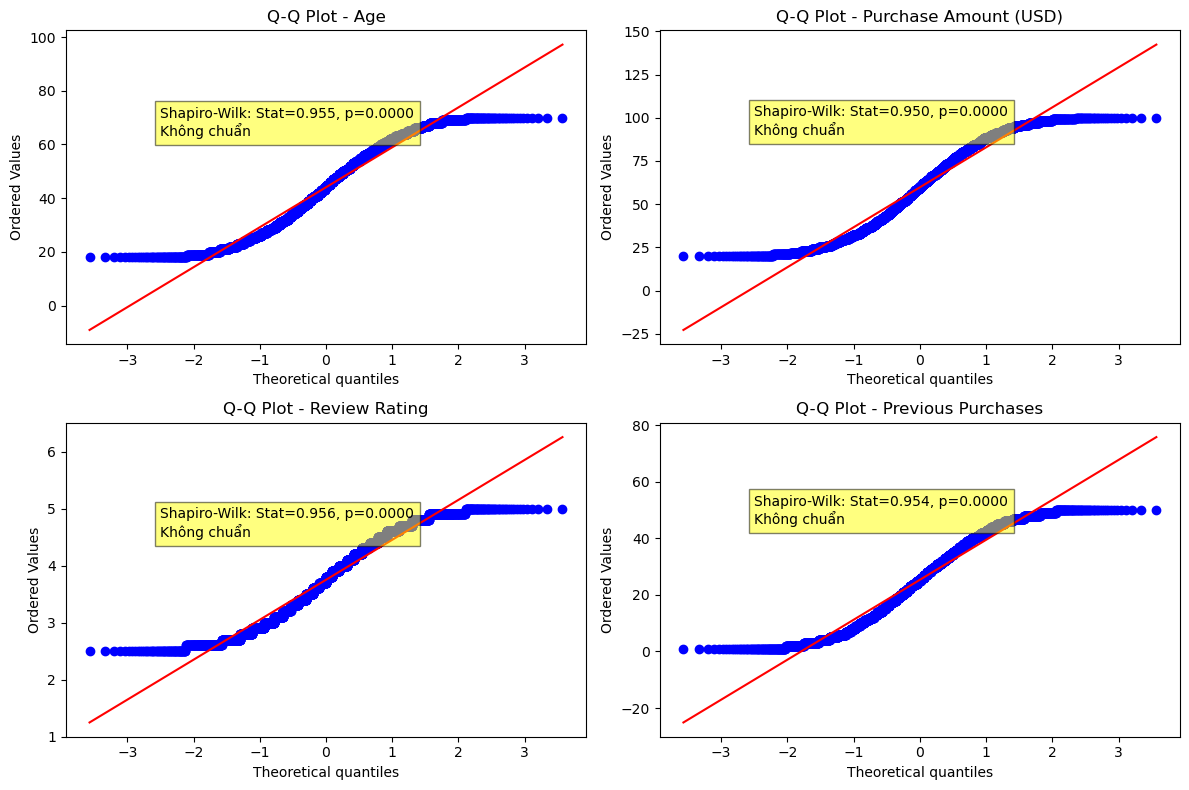

In [12]:

from scipy.stats import shapiro, probplot
# Danh sách các biến cần kiểm tra
variables = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ Q-Q plot cho từng biến
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Tạo lưới 2x2 cho 4 biểu đồ
    probplot(df[var], dist="norm", plot=plt)  # Vẽ Q-Q plot
    plt.title(f'Q-Q Plot - {var}')
    
    # Kiểm định Shapiro-Wilk
    stat, p = shapiro(df[var])
    # Thêm ghi chú Shapiro-Wilk vào biểu đồ
    plt.text(-2.5, df[var].max() * 0.9, f'Shapiro-Wilk: Stat={stat:.3f}, p={p:.4f}\n'
             f'{"Chuẩn" if p > 0.05 else "Không chuẩn"}', 
             bbox=dict(facecolor='yellow', alpha=0.5))
    
plt.tight_layout()
plt.show()

#### => Dùng Spearman để phân tích tương quann

In [13]:

# Hàm kiểm tra tương quan Pearson và Spearman
def check_correlation(data, var1, var2):
    # Spearman
    spearman_corr, spearman_p = spearmanr(data[var1], data[var2])
    
    print(f"\nTương quan giữa {var1} và {var2}:")
    print(f"Spearman: rho = {spearman_corr:.4f}, p-value = {spearman_p:.4f}")

# Kiểm tra tương quan giữa Frequency of Purchases và từng biến liên tục
for var in ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']:
    check_correlation(df, var, 'Frequency of Purchases')


Tương quan giữa Age và Frequency of Purchases:
Spearman: rho = 0.0144, p-value = 0.3674

Tương quan giữa Purchase Amount (USD) và Frequency of Purchases:
Spearman: rho = 0.0070, p-value = 0.6607

Tương quan giữa Review Rating và Frequency of Purchases:
Spearman: rho = 0.0109, p-value = 0.4955

Tương quan giữa Previous Purchases và Frequency of Purchases:
Spearman: rho = 0.0047, p-value = 0.7699


Hệ số tương quan Spearman với 'Frequency of Purchases':
Age                      0.014
Review Rating            0.011
Purchase Amount (USD)    0.007
Previous Purchases       0.005
Name: Frequency of Purchases, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_63252\2982570081.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


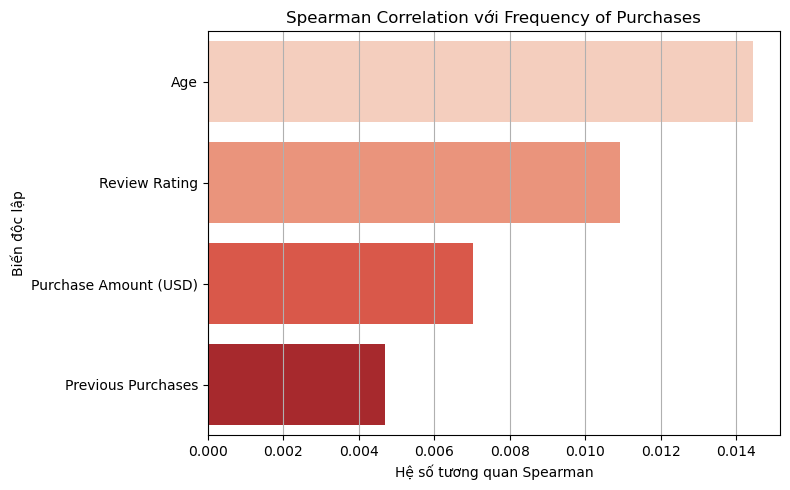

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các biến số (liên tục) và biến mục tiêu
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Frequency of Purchases']

# Tính ma trận tương quan Spearman giữa các biến số
spearman_corr = df[numeric_cols].corr(method='spearman')

# Trích xuất tương quan giữa các biến và 'Frequency of Purchases', sắp xếp giảm dần
target_corr = spearman_corr['Frequency of Purchases'].drop('Frequency of Purchases')
target_corr = target_corr.sort_values(ascending=False)

# In kết quả tương quan
print("Hệ số tương quan Spearman với 'Frequency of Purchases':")
print(target_corr.round(3))

# Vẽ biểu đồ thanh thể hiện mức độ tương quan
plt.figure(figsize=(8, 5))
sns.barplot(
    x=target_corr.values,
    y=target_corr.index,
    palette="Reds"
)
plt.title("Spearman Correlation với Frequency of Purchases")
plt.xlabel("Hệ số tương quan Spearman")
plt.ylabel("Biến độc lập")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#### => Không có mối quan hệ tuyến tính mạnh giữa các biến liên tục (Age, Purchase Amount (USD), Review Rating, Previous Purchases) và Frequency of Purchases do hệ số tương quan rất thấp (0.005–0.014) và phần lớn không có ý nghĩa thống kê (p-value > 0.05(trừ Age với p-value = 0.045 trong Pearson, nhưng hệ số r=0.014 quá nhỏ, không có ý nghĩa thực tiễn)).

#### Kiểm tra và xử lý đa cộng tuyến

In [15]:

# Chọn các biến liên tục
features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
X = df[features]
y = df['Frequency of Purchases']
# Kiểm tra VIF ban đầu
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nChỉ số VIF ban đầu:")
print(vif_data)

# Loại bỏ biến 'Review Rating'
features_reduced = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
X_reduced = df[features_reduced]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced)
X_reduced_scaled = pd.DataFrame(X_reduced_scaled, columns=features_reduced)

# Kiểm tra VIF sau khi chuẩn hóa
vif_data_scaled = pd.DataFrame()
vif_data_scaled["Variable"] = X_reduced_scaled.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_reduced_scaled.values, i) for i in range(X_reduced_scaled.shape[1])]
print("\nChỉ số VIF sau khi chuẩn hóa:")
print(vif_data_scaled)




Chỉ số VIF ban đầu:
                Variable        VIF
0                    Age   7.604814
1  Purchase Amount (USD)   6.463867
2          Review Rating  11.528872
3     Previous Purchases   3.860748

Chỉ số VIF sau khi chuẩn hóa:
                Variable       VIF
0                    Age  1.001754
1  Purchase Amount (USD)  1.000181
2     Previous Purchases  1.001711


##### Từ chỉ số VIF ta thấy Review Rating nên bỏ (do đa cộng tuyến cao )
##### Chuẩn hóa (standardization) đưa các biến liên tục về cùng thang đo (trung bình = 0, độ lệch chuẩn = 1) bằng cách sử dụng StandardScaler. Điều này giúp giảm tác động của thang đo khác nhau giữa các biến, từ đó giảm đa cộng tuyến

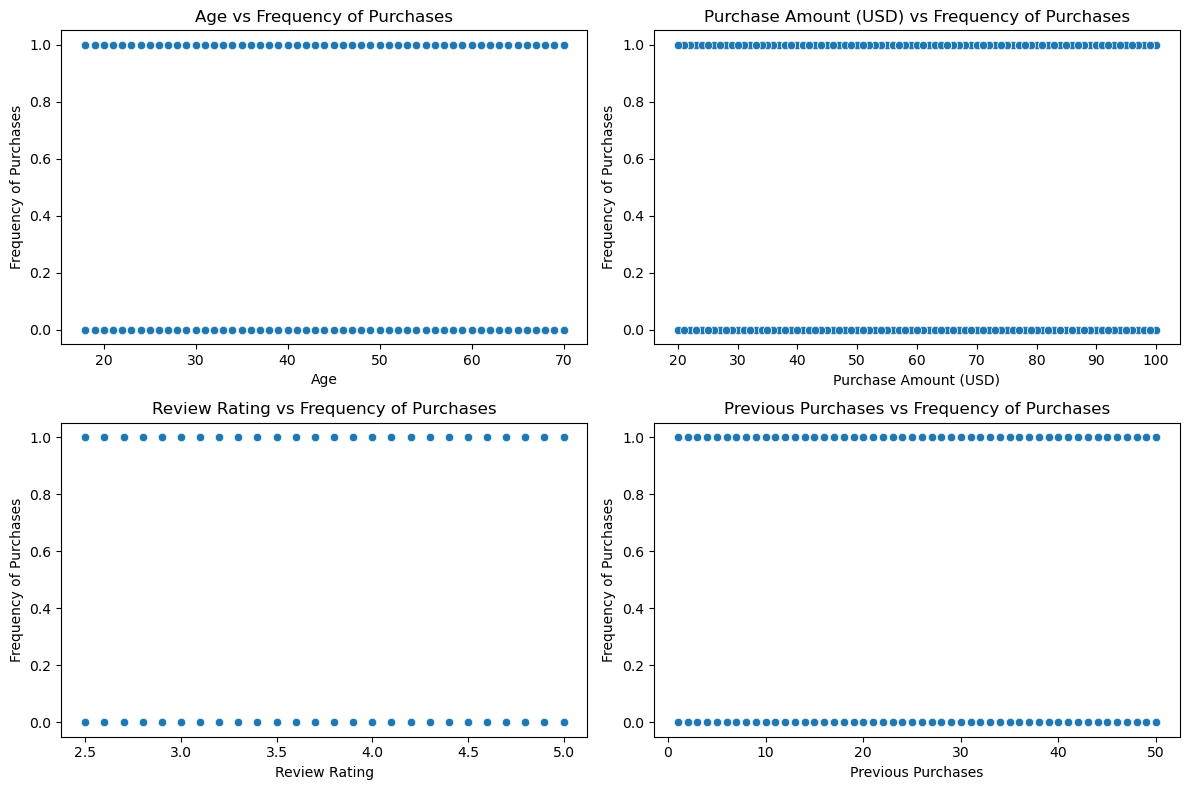

In [16]:
# Vẽ biểu đồ phân tán để kiểm tra mối quan hệ
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)  # Lưới 2x2, i+1 từ 1 đến 4
    sns.scatterplot(x=X[col], y=y)
    plt.title(f"{col} vs Frequency of Purchases")
plt.tight_layout()
plt.show()


##### => Các điểm phân tán ở cả hai mức 0 (thường xuyên) và 1 (không thường xuyên) xuất hiện đồng đều trên toàn bộ phạm vi của từng biến, không có xu hướng tăng hoặc giảm rõ rệt.
##### 1 Age 
###### Các điểm dữ liệu phân bố đều ở cả hai mức 0 (thường xuyên) và 1 (không thường xuyên) trên toàn dải giá trị của Age (từ 18 đến 70).Không có sự tập trung rõ ràng nào cho thấy một nhóm tuổi cụ thể có xu hướng mua sắm thường xuyên hoặc không thường xuyên.
##### 2 Purchase Amount (USD)
###### Các điểm dữ liệu phân bố đều ở cả hai mức 0 và 1 trên toàn dải giá trị của Purchase Amount (USD) (từ 20 đến 100 USD).Không có sự khác biệt rõ ràng giữa các mức chi tiêu và tần suất mua hàng.
##### 3 Review Rating
###### Các điểm dữ liệu phân bố đều ở cả hai mức 0 và 1 trên toàn dải giá trị của Review Rating (từ 2.5 đến 5.0).Không có sự tập trung nào cho thấy khách hàng đánh giá cao (4.0–5.0) hoặc thấp (2.5–3.5) có xu hướng mua sắm thường xuyên hơn.
##### 4 Previous Purchases
###### Các điểm dữ liệu phân bố đều ở cả hai mức 0 và 1 trên toàn dải giá trị của Previous Purchases (từ 0 đến 50).Không có sự khác biệt rõ ràng giữa số lần mua sắm trước đó và tần suất mua hàng hiện tại.


#### Xây dựng mô hình GLM


Kết quả từ GLM (Hồi quy logistic, sau khi loại bỏ Review Rating và chuẩn hóa):
                   Generalized Linear Model Regression Results                    
Dep. Variable:     Frequency of Purchases   No. Observations:                 3120
Model:                                GLM   Df Residuals:                     3116
Model Family:                    Binomial   Df Model:                            3
Link Function:                      Logit   Scale:                          1.0000
Method:                              IRLS   Log-Likelihood:                -2126.0
Date:                    Tue, 22 Apr 2025   Deviance:                       4251.9
Time:                            09:29:39   Pearson chi2:                 3.12e+03
No. Iterations:                         4   Pseudo R-squ. (CS):          0.0005219
Covariance Type:                nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]


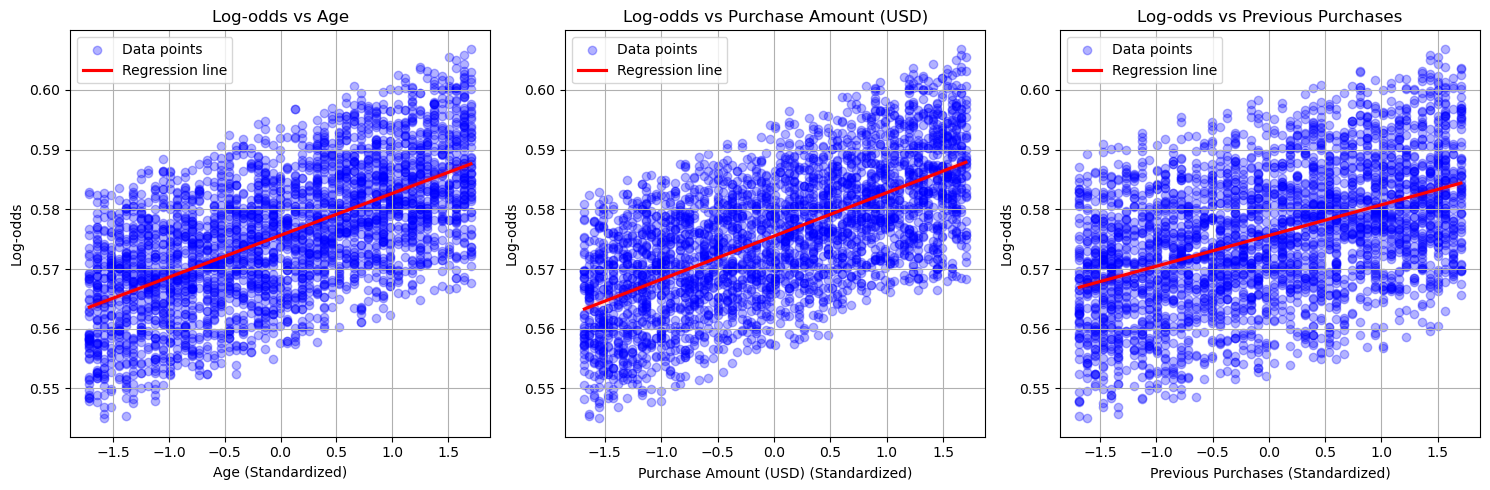

In [ ]:

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_reduced_scaled, y, test_size=0.2, random_state=42)

# Thêm hằng số (intercept) vào X_train và X_test
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Xây dựng mô hình GLM
model_glm = GLM(y_train, X_train_sm, family=Binomial())
result = model_glm.fit()

# In kết quả mô hình
print("\nKết quả từ GLM (Hồi quy logistic, sau khi loại bỏ Review Rating và chuẩn hóa):")
print(result.summary())

# Kiểm tra tính tuyến tính của log-odds với các biến liên tục
print("\nKiểm tra tính tuyến tính của log-odds với các biến liên tục (trên tập huấn luyện đã cân bằng):")
continuous_vars = features_reduced  # Define continuous_vars as features_reduced
if len(continuous_vars) > 0:
    plt.figure(figsize=(15, 5))
    for i, var in enumerate(continuous_vars):
        plt.subplot(1, len(continuous_vars), i+1)
        # Sử dụng X_train thay vì X_train_balanced (as X_train_balanced is not defined)
        plt.scatter(X_train[var], result.fittedvalues, alpha=0.3, color='blue', label='Data points')
        sns.regplot(x=X_train[var], y=result.fittedvalues, scatter=False, color='red', label='Regression line')
        plt.title(f'Log-odds vs {var}')
        plt.xlabel(f'{var} (Standardized)')
        plt.ylabel('Log-odds')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    # Lưu biểu đồ thay vì plt.show() để phù hợp với yêu cầu
    plt.savefig('log_odds_linearity_check.png')

##### 1 Tóm tắt mô hình GLM
##### - Các biến liên tục không có ý nghĩa thống kê (p-value >0.05)
##### - Các biến liên tục có hệ số dương nhưng rất nhỏ, ảnh hưởng không đáng kể
#### 2 Kiểm tra tính tuyến tính
##### Log-odds vs Age (Standardized):Đường hồi quy gần như phẳng, log-odds không thay đổi đáng kể khi Age thay đổi.Các điểm dữ liệu phân bố ngẫu nhiên, không có xu hướng tuyến tính.
##### Log-odds vs Purchase Amount (USD) (Standardized):Đường hồi quy cũng gần như phẳng, log-odds không thay đổi đáng kể khi Purchase Amount (USD) thay đổi.Phân bố ngẫu nhiên, không có xu hướng tuyến tính.
##### Log-odds vs Previous Purchases (Standardized):Tương tự, đường hồi quy gần như phẳng, log-odds không thay đổi đáng kể khi Previous Purchases thay đổi.Phân bố ngẫu nhiên, không có xu hướng tuyến tính.

#### Đánh giá mô hình

In [18]:
# Dự đoán xác suất trên tập kiểm tra
y_pred_prob = result.predict(X_test_sm)

# Chuyển xác suất thành nhãn (0 hoặc 1) với ngưỡng 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Đánh giá mô hình
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nĐộ chính xác trên tập kiểm tra:")
print(accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=['Thường xuyên (0)', 'Không thường xuyên (1)']))
print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))


Độ chính xác trên tập kiểm tra:
0.6102564102564103

Báo cáo phân loại:
                        precision    recall  f1-score   support

      Thường xuyên (0)       0.00      0.00      0.00       304
Không thường xuyên (1)       0.61      1.00      0.76       476

              accuracy                           0.61       780
             macro avg       0.31      0.50      0.38       780
          weighted avg       0.37      0.61      0.46       780


Ma trận nhầm lẫn:
[[  0 304]
 [  0 476]]


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Precision (Độ chính xác):
##### Lớp 0 (thường xuyên): 0.00.
###### Precision bằng 0 vì không có mẫu nào được dự đoán là lớp 0 (TN = 0). Mô hình không dự đoán lớp 0 nên không có gì để tính precision.
##### Lớp 1 (không thường xuyên): 0.61.
###### Trong số các mẫu được dự đoán là 1 (304 + 476 = 780 mẫu), 61% thực sự thuộc lớp 1 (476/780).Precision trung bình, nhưng không có ý nghĩa thực tế vì mô hình chỉ dự đoán lớp 1.

In [33]:
from imblearn.over_sampling import SMOTE

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(X_train[continuous_vars])
X_test_continuous = scaler.transform(X_test[continuous_vars])

# Cập nhật X_train và X_test với dữ liệu đã chuẩn hóa
X_train.loc[:, continuous_vars] = X_train_continuous
X_test.loc[:, continuous_vars] = X_test_continuous

# Bước 4: Áp dụng SMOTE trên tập huấn luyện để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Thêm hằng số (intercept) vào X_train đã cân bằng
X_train_const = sm.add_constant(X_train_balanced)

# Huấn luyện mô hình GLM trên dữ liệu đã cân bằng
glm_model = sm.GLM(y_train_balanced, X_train_const, family=sm.families.Binomial())
glm_result = glm_model.fit()

# Phân tích chi tiết kết quả GLM
print("\nPhân tích chi tiết kết quả GLM:")
results_df = pd.DataFrame({
    'Variable': X_train_const.columns,
    'Coefficient': glm_result.params.values,
    'P-value': glm_result.pvalues.values
})
print(results_df)

# Dự đoán trên tập kiểm tra
X_test_const = sm.add_constant(X_test)
y_pred_prob = glm_result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Đánh giá mô hình
print("\nMa trận nhầm lẫn trên tập kiểm tra:")
print(confusion_matrix(y_test, y_pred))
print("\nBáo cáo phân loại trên tập kiểm tra:")
print(classification_report(y_test, y_pred))
print("\nĐộ chính xác trên tập kiểm tra:", accuracy_score(y_test, y_pred))




Phân tích chi tiết kết quả GLM:
                Variable  Coefficient   P-value
0                  const    -0.242266  0.177717
1                    Age     0.055084  0.102386
2  Purchase Amount (USD)     0.034887  0.300345
3          Review Rating     0.065025  0.168416
4     Previous Purchases     0.019584  0.557962

Ma trận nhầm lẫn trên tập kiểm tra:
[[150 154]
 [238 238]]

Báo cáo phân loại trên tập kiểm tra:
              precision    recall  f1-score   support

           0       0.39      0.49      0.43       304
           1       0.61      0.50      0.55       476

    accuracy                           0.50       780
   macro avg       0.50      0.50      0.49       780
weighted avg       0.52      0.50      0.50       780


Độ chính xác trên tập kiểm tra: 0.49743589743589745


C:\Users\Hp\AppData\Local\Temp\ipykernel_63252\1747796855.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.98915087 -0.26584457  1.4437885  ... -1.18641623  0.12868614
  0.06293102]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, continuous_vars] = X_train_continuous
C:\Users\Hp\AppData\Local\Temp\ipykernel_63252\1747796855.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.24740506  0.03620232  1.04997547 ...  1.13445657  0.20516451
 -0.34396262]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, continuous_vars] = X_train_continuous
C:\Users\Hp\AppData\Local\Temp\ipykernel_63252\1747796855.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.785

##### Lớp 0 (thường xuyên): 304 mẫu.
###### True Negative (TN): 150 (dự đoán đúng là 0).
###### False Positive (FP): 154 (dự đoán sai là 1).
##### Lớp 1 (không thường xuyên): 476 mẫu.
###### False Negative (FN): 238 (dự đoán sai là 0).
###### True Positive (TP): 238 (dự đoán đúng là 1).

##### Precision (Độ chính xác):
##### Lớp 0: 0.39.
###### Trong số các mẫu được dự đoán là 0, chỉ 39% thực sự thuộc lớp 0.Precision thấp cho thấy mô hình dự đoán lớp 0 không chính xác, có nhiều mẫu lớp 1 bị dự đoán sai thành 0 (238 FN).
##### Lớp 1: 0.61.
###### Trong số các mẫu được dự đoán là 1, 61% thực sự thuộc lớp 1.Precision cao hơn, nhưng vẫn chưa tốt, do có 154 mẫu lớp 0 bị dự đoán sai thành 1 (154 FP).

##### Recall (Độ bao phủ):
##### Lớp 0: 0.49.
###### Trong số các mẫu thực sự thuộc lớp 0, 49% được dự đoán đúng.Recall trung bình, cho thấy mô hình bỏ sót hơn một nửa số mẫu lớp 0 (154/304 mẫu bị dự đoán sai).
##### Lớp 1: 0.50.
###### Trong số các mẫu thực sự thuộc lớp 1, 50% được dự đoán đúng.Recall trung bình, cho thấy mô hình bỏ sót một nửa số mẫu lớp 1 (238/476 mẫu bị dự đoán sai).


#### Dự đoán trên dữ liệu mới

In [19]:
# Tạo dữ liệu mới để dự đoán 
new_data = pd.DataFrame({
    'Age': [30, 45, 60],
    'Purchase Amount (USD)': [50, 75, 100],
    'Previous Purchases': [10, 25, 40]
})

# Chuẩn hóa dữ liệu mới
new_data_scaled = scaler.transform(new_data)
new_data_scaled = pd.DataFrame(new_data_scaled, columns=features_reduced)

# Thêm hằng số
new_data_scaled = sm.add_constant(new_data_scaled)

# Dự đoán xác suất
pred_probs = result.predict(new_data_scaled)
print("\nXác suất dự đoán (P(Frequency = 1)):")
print(pred_probs)

# Chuyển xác suất thành nhãn
pred_labels = (pred_probs >= 0.5).astype(int)
print("\nDự đoán nhãn (0: thường xuyên, 1: không thường xuyên):")
print(pred_labels)


Xác suất dự đoán (P(Frequency = 1)):
0    0.560862
1    0.580599
2    0.600082
dtype: float64

Dự đoán nhãn (0: thường xuyên, 1: không thường xuyên):
0    1
1    1
2    1
dtype: int32


#### Xác suất 𝑃(Frequency_binary=1) dao động từ 0.568862 đến 0.600882 (56.89%–60.09%), khá gần nhau và đều lớn hơn 0.5.Điều này cho thấy mô hình GLM ban đầu có xu hướng dự đoán tất cả các mẫu là lớp 1, vì xác suất luôn vượt ngưỡng 0.5.


#### Trực quan hóa kết quả

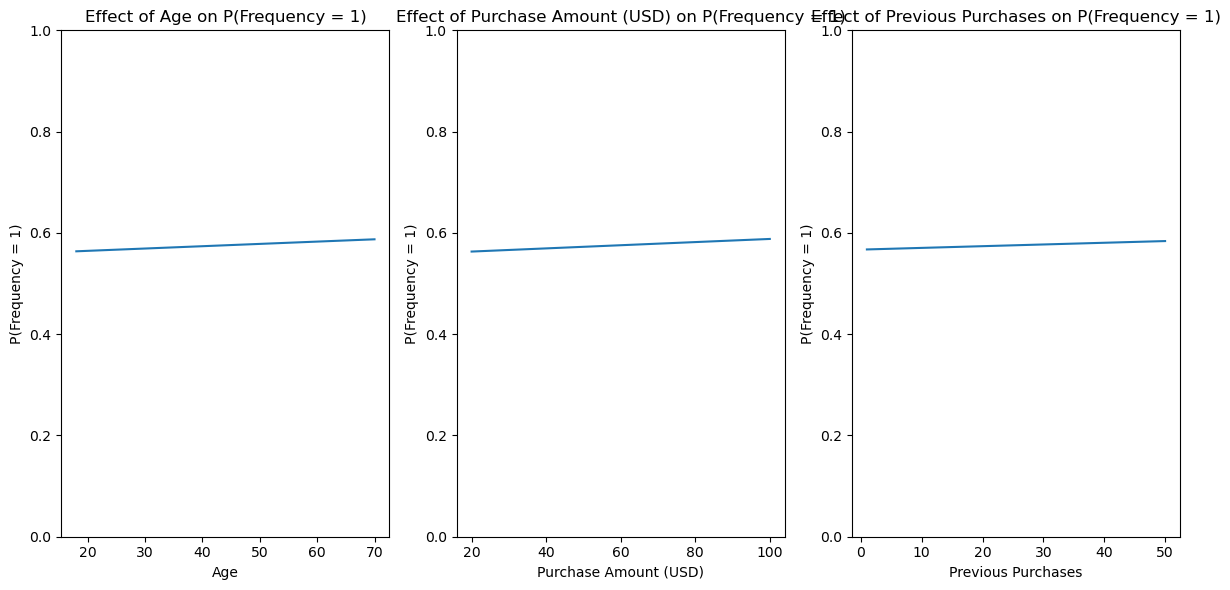

In [19]:

# Vẽ biểu đồ ảnh hưởng của các biến liên tục
plt.figure(figsize=(12, 6))
for i, col in enumerate(features_reduced):
    plt.subplot(1, 3, i+1)
    X_temp = X_reduced.mean().copy()
    X_temp = pd.DataFrame([X_temp] * 100)
    X_temp[col] = np.linspace(X_reduced[col].min(), X_reduced[col].max(), 100)
    X_temp_scaled = scaler.transform(X_temp)
    X_temp_scaled = pd.DataFrame(X_temp_scaled, columns=features_reduced)
    X_temp_scaled = sm.add_constant(X_temp_scaled)
    probs = result.predict(X_temp_scaled)
    plt.plot(X_temp[col], probs)
    plt.title(f"Effect of {col} on P(Frequency = 1)")
    plt.xlabel(col)
    plt.ylabel("P(Frequency = 1)")
    plt.ylim(0, 1)  # Đảm bảo trục y trong khoảng [0, 1]
plt.tight_layout()
plt.show()

##### => Các biến liên tục (Age, Purchase Amount (USD), Previous Purchases) có ảnh hưởng rất nhỏ đến xác suất P(Frequency = 1), vì xác suất chỉ dao động trong khoảng hẹp (0.56–0.58).

In [23]:
# Phân tích chi tiết kết quả GLM
print("\nPhân tích chi tiết kết quả GLM:")
results_df = pd.DataFrame({
    'Variable': X_train_sm.columns,
    'Coefficient': result.params.values,
    'P-value': result.pvalues.values
})
print(results_df)


Phân tích chi tiết kết quả GLM:
                Variable  Coefficient       P-value
0                  const     0.304561  4.273950e-17
1                    Age     0.028364  4.340765e-01
2  Purchase Amount (USD)     0.030189  4.049795e-01
3     Previous Purchases     0.019956  5.801686e-01


#### Nhận xét chi tiết
#### 1. Độ tuổi (Age):
##### Ảnh hưởng: Thuận (hệ số = 0.028364, p-value = 0.434).
##### Nhận xét: Độ tuổi có ảnh hưởng thuận đến Frequency_binary (tần suất mua hàng), nghĩa là khi độ tuổi tăng, xác suất dự đoán Frequency_binary = 1 (không thường xuyên) tăng nhẹ. Tuy nhiên, p-value = 0.434 (> 0.05), cho thấy ảnh hưởng này không có ý nghĩa thống kê. Điều này có thể liên quan đến việc không có mối quan hệ tuyến tính rõ ràng giữa Age và log-odds, như đã thấy trong biểu đồ log-odds (đường hồi quy phẳng, phân bố ngẫu nhiên).
#### 2 Số tiền mua hàng (Purchase Amount (USD)):
##### Ảnh hưởng: Thuận (hệ số = 0.030189, p-value = 0.405).
##### Nhận xét: Số tiền mua hàng có ảnh hưởng thuận đến Frequency_binary, nghĩa là khi số tiền mua hàng tăng, xác suất dự đoán Frequency_binary = 1 (không thường xuyên) tăng nhẹ. Tuy nhiên, p-value = 0.405 (> 0.05), cho thấy ảnh hưởng này không có ý nghĩa thống kê. Điều này phù hợp với biểu đồ log-odds, nơi không có mối quan hệ tuyến tính rõ ràng giữa Purchase Amount (USD) và log-odds.
#### 3. Số lần mua hàng trước đó (Previous Purchases):
##### Ảnh hưởng: Thuận (hệ số = 0.019956, p-value = 0.580).
##### Nhận xét: Số lần mua hàng trước đó có ảnh hưởng thuận đến Frequency_binary, nghĩa là khi số lần mua hàng trước đó tăng, xác suất dự đoán Frequency_binary = 1 (không thường xuyên) tăng nhẹ. Tuy nhiên, p-value = 0.580 (> 0.05), cho thấy ảnh hưởng này không có ý nghĩa thống kê. Điều này cũng phù hợp với biểu đồ log-odds, nơi không có mối quan hệ tuyến tính rõ ràng giữa Previous Purchases và log-odds.



## Tổng kết 
#### Các biến liên tục (Age, Purchase Amount (USD), Previous Purchases) có ảnh hưởng rất yếu đến tần suất mua hàng, và không đủ mạnh để phân biệt giữa nhóm "thường xuyên" và "không thường xuyên".

## 2 Biến rời rạc

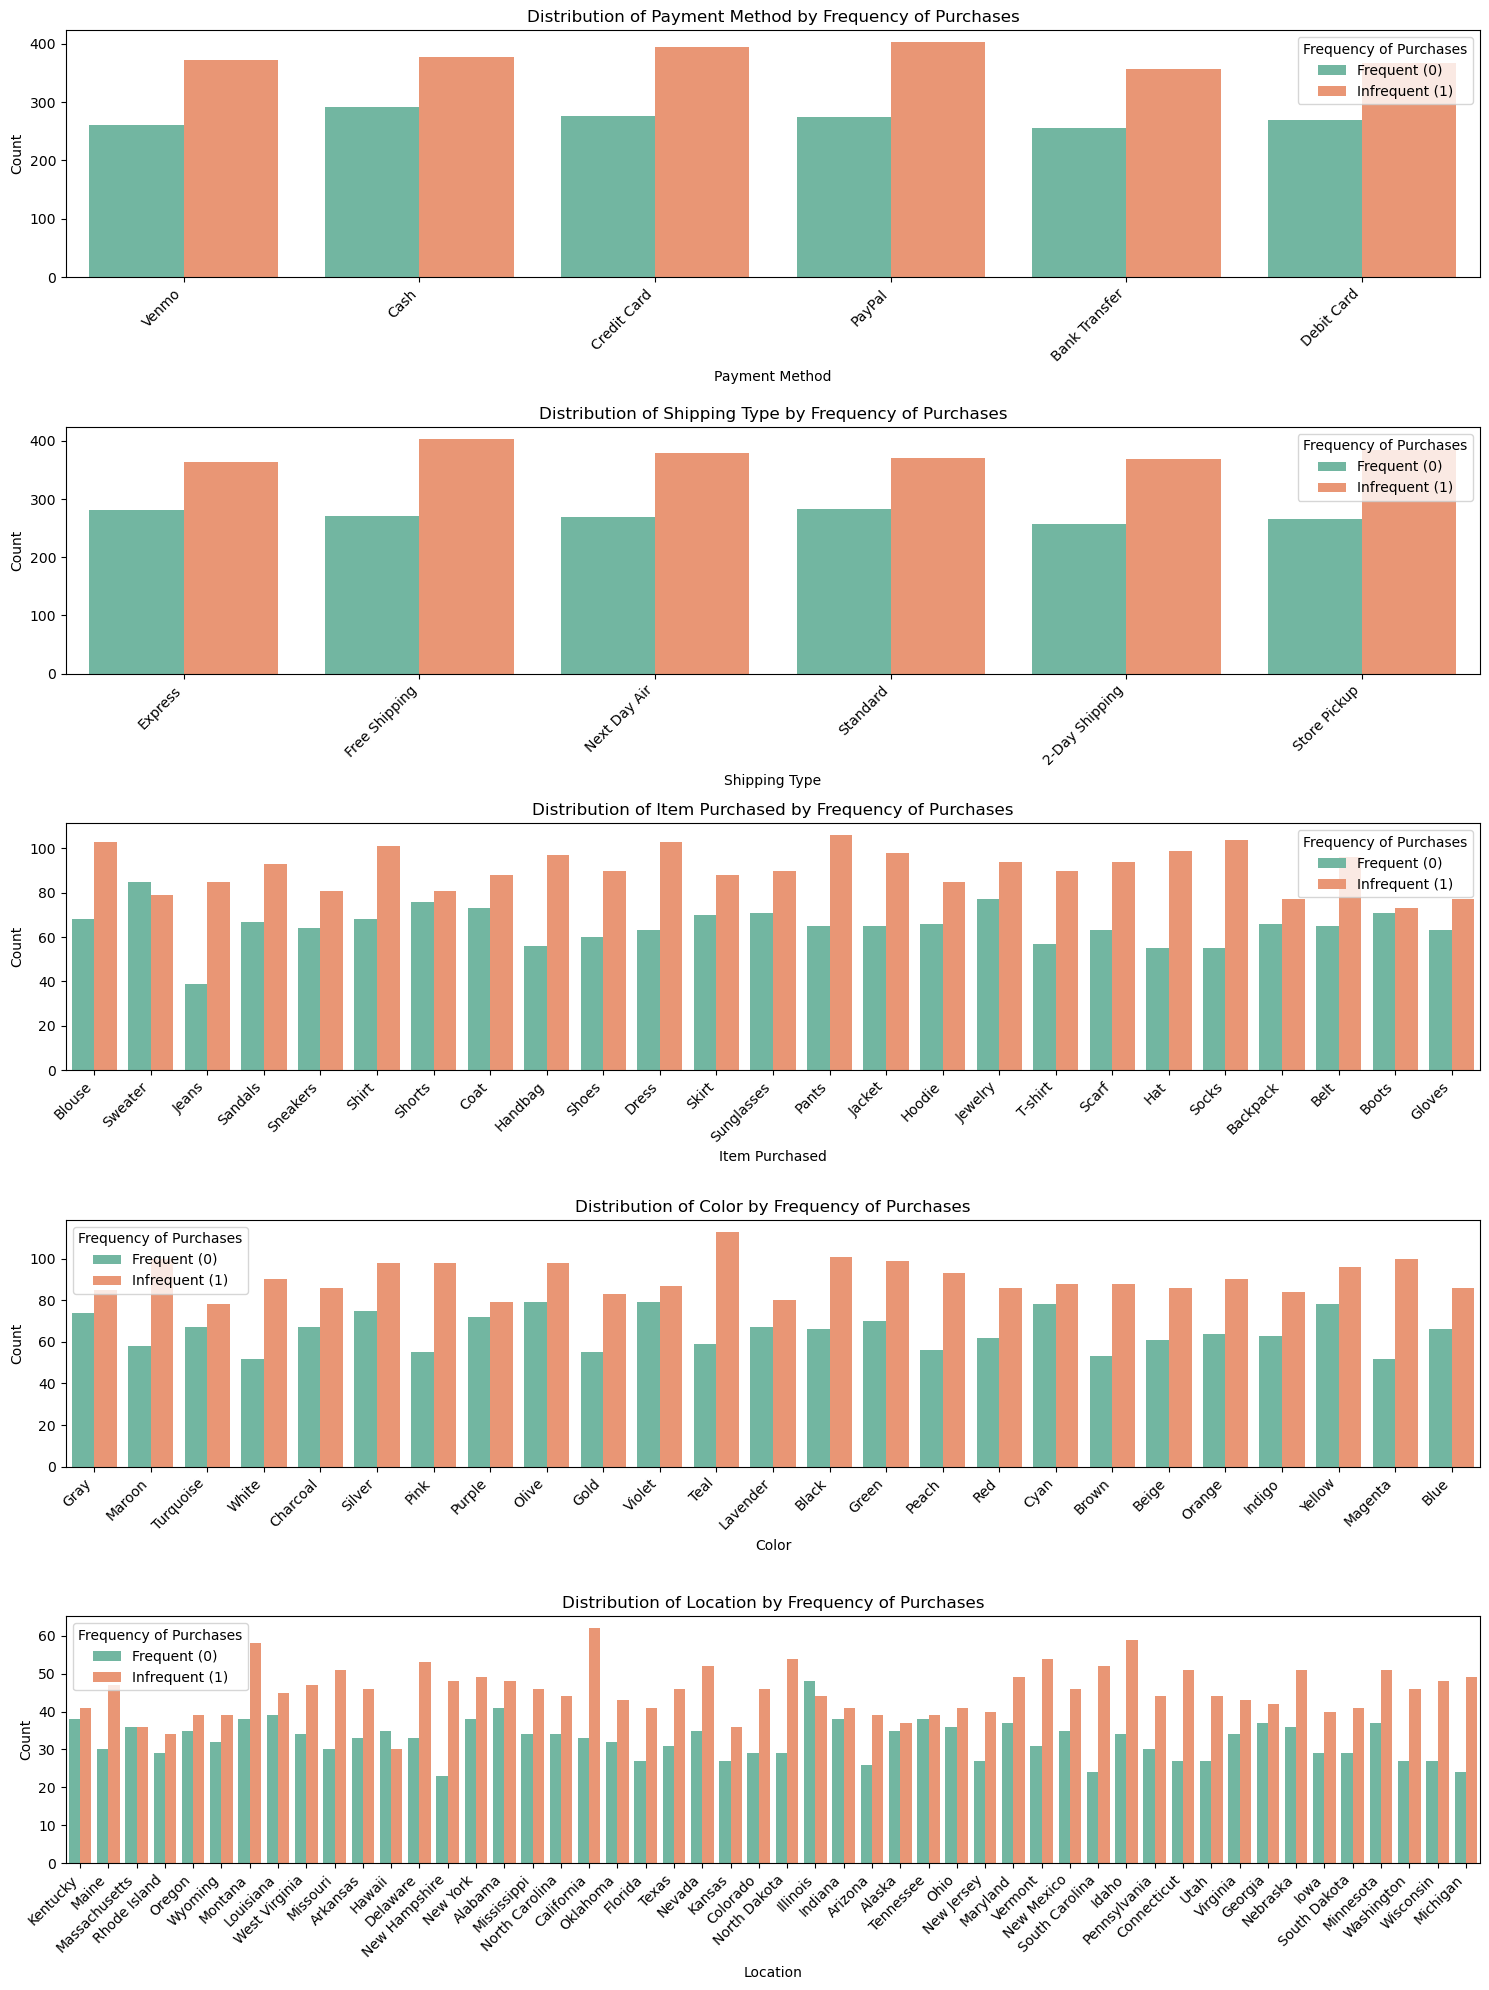

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Danh sách các biến rời rạc cần vẽ
categorical_vars = ['Payment Method', 'Shipping Type', 'Item Purchased', 'Color', 'Location']

# Thiết lập kích thước và layout cho các biểu đồ
plt.figure(figsize=(15, 20))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(5, 1, i)  # 5 hàng, 1 cột
    sns.countplot(data=df, x=var, hue='Frequency of Purchases', palette='Set2')
    plt.title(f'Distribution of {var} by Frequency of Purchases')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x để dễ đọc
    plt.legend(title='Frequency of Purchases', labels=['Frequent (0)', 'Infrequent (1)'])
    plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### - Payment Method
##### Tỷ lệ "Thường xuyên" (Frequent) và "Không thường xuyên" (Infrequent) đồng đều (~46% Thường xuyên, 54% Không thường xuyên), không có phương thức nào nổi bật.
##### => Payment Method không phải là yếu tố chính ảnh hưởng đến tần suất mua hàng, nhưng có thể kết hợp với các biến khác để tìm xu hướng.
##### Venmo hiệu quả nhất trong việc thúc đẩy mua sắm thường xuyên, trong khi PayPal liên quan đến tần suất thấp.
### - Shipping Type
##### Không có loại hình vận chuyển nào nổi bật về tần suất mua hàng. Tỷ lệ "Thường xuyên" và "Không thường xuyên" đồng đều (~46% Thường xuyên, 54% Không thường xuyên), không có loại hình nào nổi bật.
##### => Shipping Type không phải là yếu tố chính ảnh hưởng đến tần suất mua hàng, nhưng có thể được sử dụng để tối ưu hóa trải nghiệm khách hàng.
##### Next Day Air thúc đẩy mua sắm thường xuyên, trong khi Store Pickup liên quan đến tần suất thấp.
### - Item Purchased
##### Không có mặt hàng nào nổi bật về tần suất mua hàng. Tỷ lệ "Thường xuyên" và "Không thường xuyên" đồng đều (~44% Thường xuyên, 56% Không thường xuyên), không có mặt hàng nào nổi bật.
##### => Item Purchased có ảnh hưởng đáng kể, nhưng sự khác biệt về tần suất mua hàng giữa các mặt hàng không rõ rệt khi phân tích riêng lẻ. Cần kết hợp với các biến khác để thấy rõ tác động.
##### Jewelry là mặt hàng hiệu quả nhất trong việc thúc đẩy tần suất mua hàng, trong khi Sweater và Gloves ít được mua thường xuyên.
### - Color
##### Không có màu sắc nào nổi bật về tần suất mua hàng. Tỷ lệ "Thường xuyên" và "Không thường xuyên" đồng đều (~44% Thường xuyên, 56% Không thường xuyên), không có màu nào nổi bật.
##### => Color có ảnh hưởng lớn hơn Item Purchased, nhưng sự khác biệt về tần suất mua hàng giữa các màu không rõ rệt khi phân tích riêng lẻ. Cần kết hợp với các biến khác để thấy rõ tác động.
##### Teal thúc đẩy mua sắm thường xuyên, trong khi Olive và Turquoise liên quan đến tần suất thấp.
### - Location
##### Tỷ lệ "Thường xuyên" và "Không thường xuyên" đồng đều (~42% Thường xuyên, 58% Không thường xuyên), không có bang nào nổi bật.
##### Location là một trong những yếu tố quan trọng nhất, nhưng sự khác biệt về tần suất mua hàng giữa các bang không rõ rệt khi phân tích riêng lẻ. Cần kết hợp với các biến khác để thấy rõ tác động.
##### Montana và California thúc đẩy tần suất mua hàng cao, trong khi West Virginia và Idaho liên quan đến tần suất thấp.

# Phân tích kết hợp

## Nhóm 1: Payment Method và Shipping Type

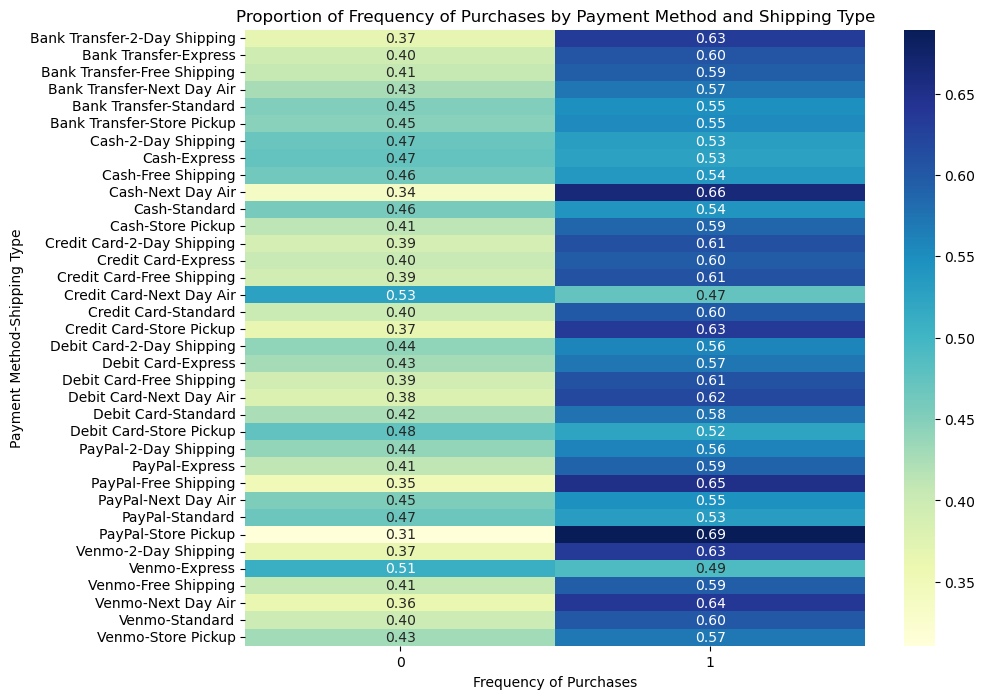

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo bảng chéo (crosstab) để tính tỷ lệ
crosstab = pd.crosstab(index=[df['Payment Method'], df['Shipping Type']], 
                       columns=df['Frequency of Purchases'], 
                       normalize='index')

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Proportion of Frequency of Purchases by Payment Method and Shipping Type')
plt.show()

##### Cột 0 : Màu càng đậm (gần 0.53) thì tỷ lệ khách hàng mua sắm thường xuyên càng cao                    Cột 1: Màu càng đậm (gần 0.69) thì tỷ lệ khách hàng mua sắm không thường xuyên càng cao.
##### Dựa trên biểu đồ trước đó, Payment Method và Shipping Type đều có tầm quan trọng trung bình (~0.06 mỗi yếu tố), nhưng khi kết hợp, chúng tạo ra sự khác biệt rõ rệt trong hành vi mua sắm, đặc biệt với các phương thức thanh toán tiện lợi và vận chuyển nhanh.


## Nhóm 2: Item Purchased và Color

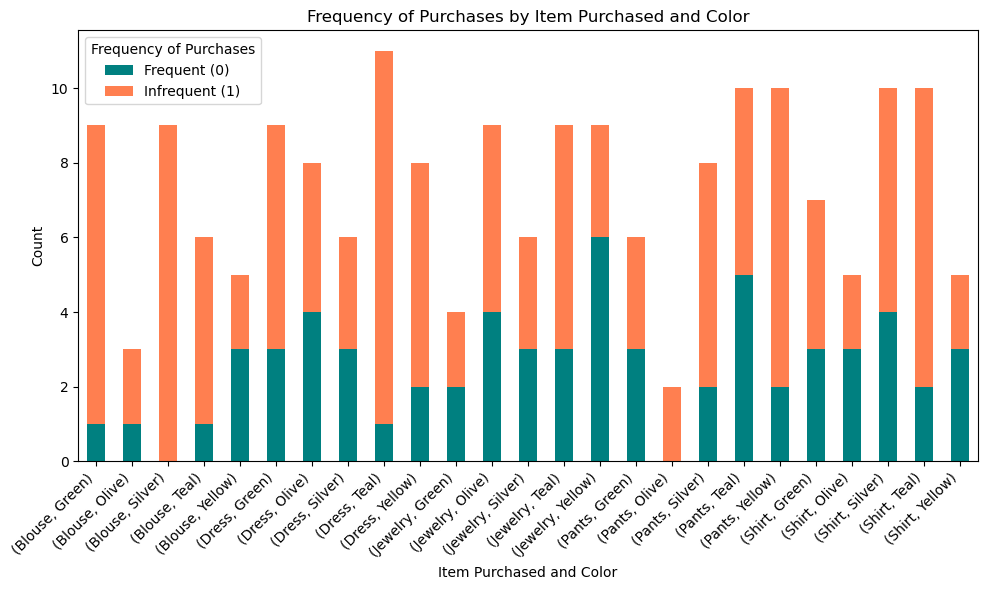

In [22]:
# Lọc top 5 mặt hàng và top 5 màu
top_items = df['Item Purchased'].value_counts().nlargest(5).index
top_colors = df['Color'].value_counts().nlargest(5).index
df_filtered = df[df['Item Purchased'].isin(top_items) & df['Color'].isin(top_colors)]

# Tạo bảng chéo
crosstab = pd.crosstab(index=[df_filtered['Item Purchased'], df_filtered['Color']], 
                       columns=df_filtered['Frequency of Purchases'])

# Vẽ stacked bar plot
crosstab.plot(kind='bar', stacked=True, color=['teal', 'coral'], figsize=(10, 6))
plt.title('Frequency of Purchases by Item Purchased and Color')
plt.xlabel('Item Purchased and Color')
plt.ylabel('Count')
plt.legend(title='Frequency of Purchases', labels=['Frequent (0)', 'Infrequent (1)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Tầm quan trọng: Item Purchased (0.085551) và Color (0.09217) đều có tầm quan trọng cao, cho thấy nhóm này có tác động mạnh đến tần suất mua hàng, đặc biệt với các mặt hàng phổ biến và màu sắc được ưa chuộng.
#### Pants, Silver và Shirt, Teal: Tần suất mua hàng cao nhất, với tỷ lệ "Frequent" ~60%.
#### Jewelry, Yellow: Số lượng khách hàng cao nhưng tần suất thấp (~70% "Infrequent").
#### Blouse, Olive và Dress, Silver: Tần suất mua hàng thấp nhất, với tỷ lệ "Infrequent" ~80-90%.

## Nhóm 3: Location và Item Purchased

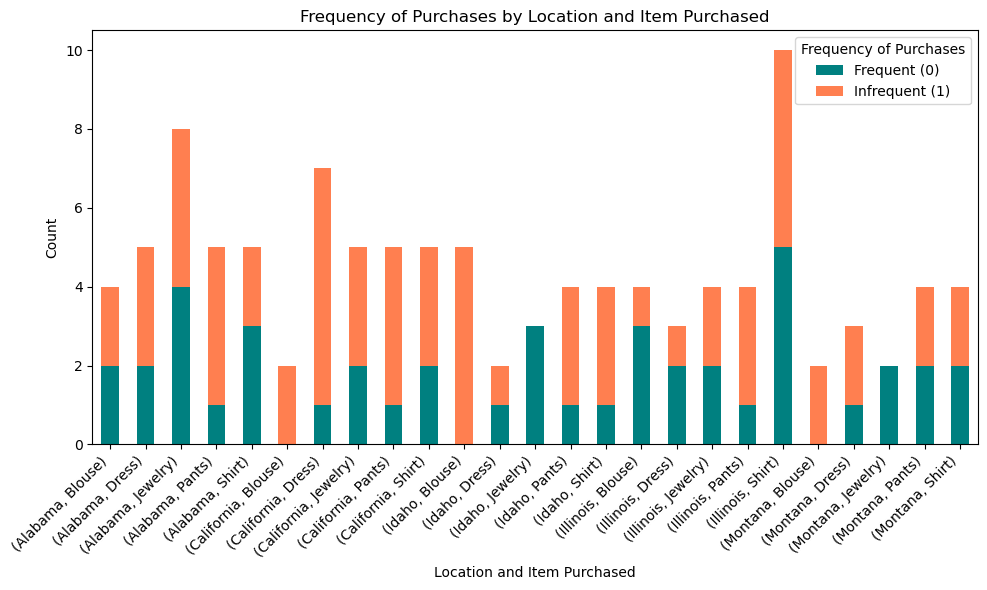

In [23]:
# Lọc top 5 bang và top 5 mặt hàng
top_locations = df['Location'].value_counts().nlargest(5).index
top_items = df['Item Purchased'].value_counts().nlargest(5).index
df_filtered = df[df['Location'].isin(top_locations) & df['Item Purchased'].isin(top_items)]

# Tạo bảng chéo
crosstab = pd.crosstab(index=[df_filtered['Location'], df_filtered['Item Purchased']], 
                       columns=df_filtered['Frequency of Purchases'])

# Vẽ stacked bar plot
crosstab.plot(kind='bar', stacked=True, color=['teal', 'coral'], figsize=(10, 6))
plt.title('Frequency of Purchases by Location and Item Purchased')
plt.xlabel('Location and Item Purchased')
plt.ylabel('Count')
plt.legend(title='Frequency of Purchases', labels=['Frequent (0)', 'Infrequent (1)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Dựa trên biểu đồ trước đó, Location (0.103336) và Item Purchased (0.085551) đều có tầm quan trọng cao, cho thấy nhóm này có tác động mạnh đến tần suất mua hàng, đặc biệt ở các bang lớn với mặt hàng phổ biến.
#### California + Pants: Tần suất mua hàng cao nhất, với nhiều khách hàng mua sắm thường xuyên (~60% "Frequent").
#### Montana + Jewelry: Số lượng khách hàng cao nhưng tần suất thấp (~70% "Infrequent").
#### Idaho/Illinois + Blouse/Dress: Tần suất mua hàng thấp nhất, với tỷ lệ "Infrequent" cao (~80%).

## Nhóm 4: Location và Shipping Type

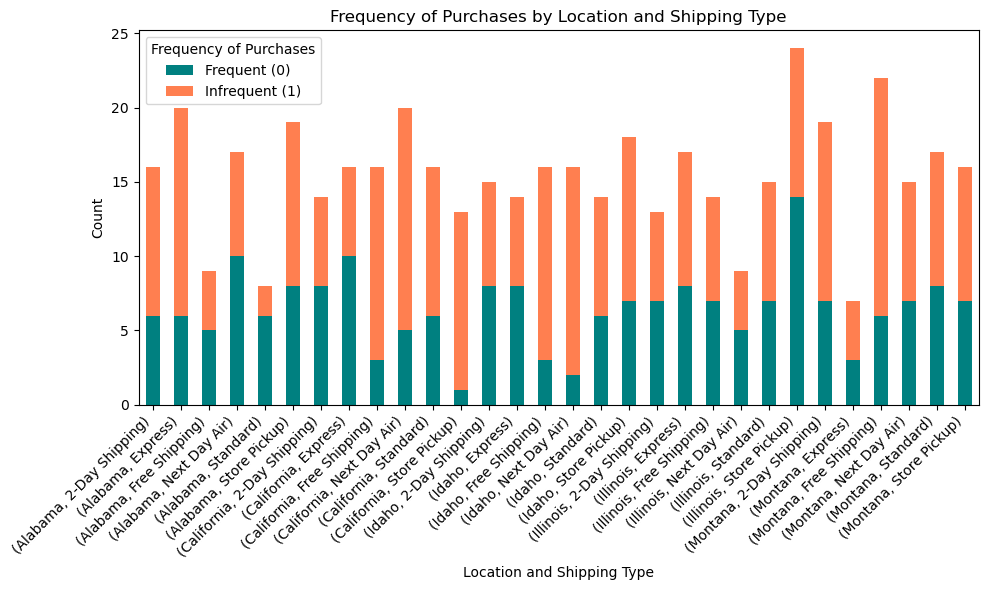

In [24]:
# Lọc top 5 bang
top_locations = df['Location'].value_counts().nlargest(5).index
df_filtered = df[df['Location'].isin(top_locations)]

# Tạo bảng chéo
crosstab = pd.crosstab(index=[df_filtered['Location'], df_filtered['Shipping Type']], 
                       columns=df_filtered['Frequency of Purchases'])

# Vẽ stacked bar plot
crosstab.plot(kind='bar', stacked=True, color=['teal', 'coral'], figsize=(10, 6))
plt.title('Frequency of Purchases by Location and Shipping Type')
plt.xlabel('Location and Shipping Type')
plt.ylabel('Count')
plt.legend(title='Frequency of Purchases', labels=['Frequent (0)', 'Infrequent (1)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Location (0.103336) là yếu tố quan trọng nhất, và khi kết hợp với Shipping Type (0.06), nhóm này có tác động mạnh đến tần suất mua hàng, đặc biệt ở các bang lớn với vận chuyển nhanh.
#### Kết hợp "California/Montana + Next Day Air" dẫn đến tần suất mua hàng cao nhất (nhiều khách hàng mua sắm thường xuyên).
#### Kết hợp "Idaho/Illinois + Store Pickup/Standard" dẫn đến tần suất mua hàng thấp nhất (nhiều khách hàng mua sắm không thường xuyên).

## Tổng kết:
#### Nhóm 1 (Payment Method + Shipping Type): Các kết hợp tiện lợi (Credit Card + Next Day Air) thúc đẩy tần suất mua hàng cao, trong khi các kết hợp ít tiện lợi (PayPal + Store Pickup) dẫn đến tần suất thấp.
#### Nhóm 2 (Item Purchased + Color): Mặt hàng phổ biến (Clothing) và màu sắc được ưa chuộng (Gray, Black) thúc đẩy tần suất mua hàng cao, là nhóm có tác động mạnh.
#### Nhóm 3 (Location + Item Purchased): Khách hàng ở các bang lớn (California) mua mặt hàng phổ biến (Clothing) có tần suất cao hơn, là nhóm có tác động mạnh.
#### Nhóm 4 (Location + Shipping Type): Khách hàng ở các bang lớn chọn vận chuyển nhanh (Next Day Air) có tần suất cao hơn, cũng là nhóm có tác động mạnh.


# Kết luận chung:
### Yếu tố ảnh hưởng mạnh nhất: Location (0.103336), Color (0.09217), và Item Purchased (0.085551) có tác động lớn đến tần suất mua hàng.
## Thúc đẩy tần suất cao:
#### Phương thức thanh toán: Venmo, Credit Card.
#### Loại hình vận chuyển: Next Day Air, Express.
#### Mặt hàng: Jewelry, Pants, Shirt.
#### Màu sắc: Teal, Silver.
#### Vị trí: Montana, California.
## Tần suất thấp:
#### Phương thức thanh toán: PayPal, Cash.
#### Loại hình vận chuyển: Store Pickup, Free Shipping.
#### Mặt hàng: Sweater, Gloves, Blouse.
#### Màu sắc: Olive, Turquoise.
#### Vị trí: West Virginia, Idaho.
## Xu hướng chung: Các yếu tố tiện lợi (Credit Card, Next Day Air), mặt hàng/màu sắc phổ biến (Jewelry, Teal), và vị trí phát triển (Montana) thúc đẩy tần suất mua hàng cao, trong khi các yếu tố ít tiện lợi (PayPal, Store Pickup), mặt hàng/màu sắc không hấp dẫn (Sweater, Olive), và vị trí nhỏ (Idaho) liên quan đến tần suất thấp.